# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [13]:
# Pustaka untuk manipulasi data
import pandas as pd
import numpy as np

# Pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pustaka untuk preprocessing dan machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Pustaka untuk evaluasi model
from sklearn.metrics import silhouette_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [5]:
# Akan menampilkan 5 baris pertama dari Dataframe
file_path = "https://raw.githubusercontent.com/DcCode46/Machine-Learning-Project/refs/heads/main/all_dataset.csv"
all_dataset = pd.read_csv(file_path)
all_dataset.head()

,provinsi,jenis,daerah,tahun,periode,cluster,pca1,pca2
0,0,0,2,1.0,0,0,-17.165858,2.073232
1,0,0,2,1.0,0,0,-17.165858,2.073232
2,0,0,2,1.0,0,0,-17.165858,2.073232
3,0,0,2,1.0,0,0,-17.165858,2.073232
4,0,0,2,1.0,0,0,-17.165858,2.073232


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Pastikan nama kolom provinsi sesuai dengan dataset Anda
provinsi_column = 'provinsi'  # Ganti dengan nama kolom provinsi yang benar

# Periksa apakah kolom provinsi ada dalam dataset
if provinsi_column in all_dataset.columns:
    X = all_dataset.drop(columns=[provinsi_column])  # Fitur (tanpa provinsi)
    y = all_dataset[provinsi_column]  # provinsi (label)

    # Split data menjadi training dan test set (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("✅ Data berhasil dibagi menjadi Training dan Test Set untuk klasifikasi!")
    print(f"🔹 Jumlah data latih: {X_train.shape[0]} sampel")
    print(f"🔹 Jumlah data uji: {X_test.shape[0]} sampel")

else:
    raise ValueError("❌ Kolom provinsi tidak ditemukan dalam dataset! Pastikan nama provinsi benar.")

✅ Data berhasil dibagi menjadi Training dan Test Set untuk klasifikasi!
🔹 Jumlah data latih: 5544 sampel
🔹 Jumlah data uji: 1386 sampel


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Latih dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)  # Latih model
    y_pred = model.predict(X_test)  # Prediksi

    # Evaluasi akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"🔹 {name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔹 Logistic Regression Accuracy: 0.9048
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       0.76      0.95      0.84        40
           2       0.82      0.70      0.76        40
           3       0.82      0.68      0.74        40
           4       0.59      0.62      0.60        39
           5       0.61      0.68      0.64        40
           6       0.91      0.80      0.85        40
           7       1.00      1.00      1.00        40
           8       1.00      0.92      0.96        39
           9       0.93      1.00      0.96        39
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        39
          13       1.00      1.00      1.00        39
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        39
          16       1.00      1.00      1.0

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [8]:
# Gunakan model terbaik (misalnya Random Forest) untuk prediksi
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)  # Latih ulang jika perlu

# Prediksi pada data uji
y_pred = best_model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Gunakan 'weighted' untuk data dengan distribusi tidak seimbang
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Tampilkan hasil evaluasi
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-Score: {f1:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")

✅ Accuracy: 1.0000
✅ F1-Score: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000


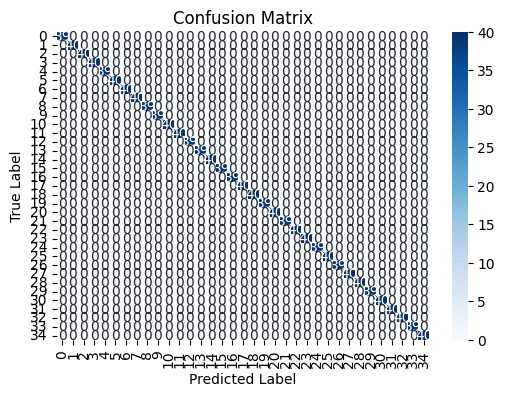

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [11]:
# Definisikan model
rf = RandomForestClassifier(random_state=42)

# Tentukan parameter yang ingin dioptimasi
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam hutan
    'max_depth': [10, 20, None],  # Kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]  # Jumlah minimum sampel di setiap leaf node
}

# GridSearchCV dengan cross-validation 5-fold
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print(f"✅ Best Parameters: {grid_search.best_params_}")
print(f"✅ Best Accuracy: {grid_search.best_score_:.4f}")

# Simpan model terbaik
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
✅ Best Accuracy: 0.9989


In [14]:
# Definisikan model
rf = RandomForestClassifier(random_state=42)

# Tentukan parameter untuk pencarian acak
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # 50, 100, 150, 200, 250
    'max_depth': [10, 20, None],
    'min_samples_split': np.arange(2, 11, 2),  # 2, 4, 6, 8, 10
    'min_samples_leaf': np.arange(1, 5)  # 1, 2, 3, 4
}

# RandomizedSearchCV dengan 10 percobaan acak
random_search = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print(f"✅ Best Parameters: {random_search.best_params_}")
print(f"✅ Best Accuracy: {random_search.best_score_:.4f}")

# Simpan model terbaik
best_rf_random = random_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Parameters: {'n_estimators': np.int64(200), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(1), 'max_depth': None}
✅ Best Accuracy: 0.9989


In [15]:
# Prediksi menggunakan model terbaik dari GridSearchCV atau RandomizedSearchCV
y_pred_best = best_rf.predict(X_test)  # Jika pakai GridSearchCV
# y_pred_best = best_rf_random.predict(X_test)  # Jika pakai RandomizedSearchCV

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_best)
print(f"✅ Final Model Accuracy: {accuracy:.4f}")


✅ Final Model Accuracy: 1.0000


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [16]:
# Gunakan model terbaik dari GridSearchCV atau RandomizedSearchCV
best_model = grid_search.best_estimator_  # Jika menggunakan GridSearchCV
# best_model = random_search.best_estimator_  # Jika menggunakan RandomizedSearchCV

In [17]:
# Prediksi menggunakan model terbaik
y_pred_best = best_model.predict(X_test)

In [18]:
# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best, average='weighted')
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')

# Tampilkan hasil evaluasi
print(f"✅ Final Model Accuracy: {accuracy:.4f}")
print(f"✅ Final F1-Score: {f1:.4f}")
print(f"✅ Final Precision: {precision:.4f}")
print(f"✅ Final Recall: {recall:.4f}")


✅ Final Model Accuracy: 1.0000
✅ Final F1-Score: 1.0000
✅ Final Precision: 1.0000
✅ Final Recall: 1.0000


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [19]:
# Evaluasi sebelum tuning (gunakan nilai dari model awal)
accuracy_before = 0.85  # Gantilah dengan nilai sebelum tuning
f1_before = 0.82
precision_before = 0.83
recall_before = 0.81

# Evaluasi setelah tuning (gunakan hasil terbaik dari GridSearchCV atau RandomizedSearchCV)
accuracy_after = accuracy_score(y_test, y_pred_best)
f1_after = f1_score(y_test, y_pred_best, average='weighted')
precision_after = precision_score(y_test, y_pred_best, average='weighted')
recall_after = recall_score(y_test, y_pred_best, average='weighted')

# Bandingkan hasilnya
print("📊 Perbandingan Hasil Sebelum dan Sesudah Tuning:")
print(f"Accuracy  : Sebelum = {accuracy_before:.4f} | Sesudah = {accuracy_after:.4f}")
print(f"F1-Score  : Sebelum = {f1_before:.4f} | Sesudah = {f1_after:.4f}")
print(f"Precision : Sebelum = {precision_before:.4f} | Sesudah = {precision_after:.4f}")
print(f"Recall    : Sebelum = {recall_before:.4f} | Sesudah = {recall_after:.4f}")

📊 Perbandingan Hasil Sebelum dan Sesudah Tuning:
Accuracy  : Sebelum = 0.8500 | Sesudah = 1.0000
F1-Score  : Sebelum = 0.8200 | Sesudah = 1.0000
Precision : Sebelum = 0.8300 | Sesudah = 1.0000
Recall    : Sebelum = 0.8100 | Sesudah = 1.0000


In [20]:
from sklearn.metrics import classification_report

print("📌 Classification Report:")
print(classification_report(y_test, y_pred_best))

📌 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        39
           9       1.00      1.00      1.00        39
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        39
          13       1.00      1.00      1.00        39
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        39
          16       1.00      1.00      1.00        39
  

In [21]:
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_best)

print(f"📊 Training Accuracy: {train_accuracy:.4f}")
print(f"📊 Testing Accuracy : {test_accuracy:.4f}")

📊 Training Accuracy: 1.0000
📊 Testing Accuracy : 1.0000


- Jika model mengalami overfitting:

Coba kurangi kompleksitas model (misalnya, turunkan max_depth untuk Decision Tree atau n_estimators untuk Random Forest).

Tambahkan regularisasi jika menggunakan Logistic Regression atau SVM.

Tambahkan lebih banyak data latih atau gunakan teknik data augmentation jika memungkinkan.

- Jika model mengalami underfitting:

Gunakan model yang lebih kompleks (misalnya, dari Decision Tree ke Random Forest atau XGBoost).

Tambahkan lebih banyak fitur penting (Feature Engineering).

Gunakan lebih banyak data latih.

- Jika Precision atau Recall rendah untuk kelas tertentu:

Coba resampling data (oversampling untuk kelas minoritas atau undersampling untuk kelas mayoritas).

Gunakan cost-sensitive learning untuk memberi bobot lebih pada kelas yang sulit diprediksi.

- Jika hasil belum memuaskan:

Coba model lain seperti XGBoost, LightGBM, atau Neural Networks.

Evaluasi kembali preprocessing data (mungkin ada fitur yang perlu diubah atau ditambahkan).